Student Name: Mohammad Taslimi

Student ID: 99101321

# Data Loading and Visulization [30 pts]

## Loading Data [20 pts]



In [ ]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

def load_data(batch_size=128, shuffle=True):
    """
    Function to load the MNIST dataset using PyTorch DataLoader.

    Parameters:
    - batch_size: Batch size for training (default is 64).
    - shuffle: Whether to shuffle the dataset (default is True).

    Returns:
    - train_loader: DataLoader for training data.
    - test_loader: DataLoader for test data.
    """
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ])

    # ToDo
    train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
    test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=shuffle)
    test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    return train_loader, test_loader


def show_images(train_loader):
    """
    Function to display samples of data.

    Parameters:
    - train_loader: Image tensor loader.
    """

def show_images(train_loader):
    """
    Function to display samples of data.

    Parameters:
    - train_loader: Image tensor loader.
    """

    images, labels = next(iter(train_loader))

    plt.figure(figsize=(8,8))
    for i in range(16):
        plt.subplot(4,4,i+1)
        plt.imshow(images[i].squeeze(), cmap='gray')
        plt.title(f'Label: {labels[i].item()}')
        plt.axis(False)
    plt.show()


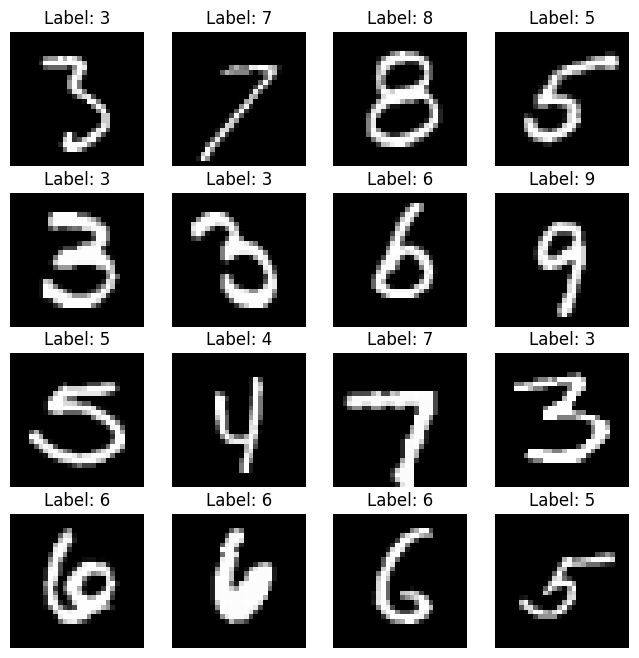

In [ ]:
# Load the MNIST dataset
train_loader, test_loader = load_data()

# Visualize a batch of images from the training data
show_images(train_loader)

# Model Training [80 pts]

## Model Definition [20 pts]

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class MLP(nn.Module):
    """
    Simple multi layer perceptron (MLP) class.
    """

    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        """
        Forward pass method to define how input data flows through the network layers.

        Parameters:
        - x: Input tensor.

        Returns:
        - out: Output tensor.
        """

        x = self.flatten(x)
        out = self.linear_relu_stack(x)
        return out


In [ ]:
from torchsummary import summary

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# Create an instance of the MLP
model = MLP().to(device)

# Display model summary
summary(model, (1, 28, 28))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
            Linear-2                  [-1, 512]         401,920
              ReLU-3                  [-1, 512]               0
            Linear-4                   [-1, 10]           5,130
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 1.55
Estimated Total Size (MB): 1.57
----------------------------------------------------------------


## Training the model [30 pts]

Complete this function! Try to tune the parameters of Epoch and Learning Rate to get best results on the test set. You must achieve accuracy > 80% on test set to get the full grade

In [ ]:
import torch.optim as optim
import torch.nn.functional as F

def evaluate_model(model, test_loader):
    """
    Function to evaluate the trained MLP model on the test set.

    Parameters:
    - model: Trained CNN model.
    - test_loader: DataLoader for test data.
    """
    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_loader:
            images, labels = data[0].to(device), data[1].to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print('Accuracy on the test set: %d %%' % (100 * correct / total))



def train_model(model, train_loader, test_loader, epochs=10, learning_rate=1e-3):
    """
    Function to train the MLP model.

    Parameters:
    - model: MLP model to be trained.
    - train_loader: DataLoader for training data.
    - test_loader: DataLoader for test data.
    - epochs: Number of epochs for training (default is 5).
    - learning_rate: Learning rate for optimization (default is 0.001).
    """

    criterion = torch.nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Training loop
    for epoch in range(1, epochs + 1):
        running_loss = 0.0

        for i, data in enumerate(train_loader, 0):

            inputs, labels = data[0].to(device), data[1].to(device)
            optimizer.zero_grad()

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            if i % 100 == 99:
                print('[Epoch %d, Batch %5d] Loss: %.3f' %
                      (epoch, i + 1, running_loss / 100))
                running_loss = 0.0

        evaluate_model(model, test_loader)

    print('Training finished')

train_model(model, train_loader, test_loader, epochs=10, learning_rate=1e-3)

[Epoch 1, Batch   100] Loss: 0.631
[Epoch 1, Batch   200] Loss: 0.348
[Epoch 1, Batch   300] Loss: 0.305
[Epoch 1, Batch   400] Loss: 0.256
Accuracy on the test set: 94 %
[Epoch 2, Batch   100] Loss: 0.182
[Epoch 2, Batch   200] Loss: 0.165
[Epoch 2, Batch   300] Loss: 0.162
[Epoch 2, Batch   400] Loss: 0.143
Accuracy on the test set: 96 %
[Epoch 3, Batch   100] Loss: 0.126
[Epoch 3, Batch   200] Loss: 0.111
[Epoch 3, Batch   300] Loss: 0.114
[Epoch 3, Batch   400] Loss: 0.107
Accuracy on the test set: 96 %
[Epoch 4, Batch   100] Loss: 0.089
[Epoch 4, Batch   200] Loss: 0.086
[Epoch 4, Batch   300] Loss: 0.084
[Epoch 4, Batch   400] Loss: 0.086
Accuracy on the test set: 97 %
[Epoch 5, Batch   100] Loss: 0.075
[Epoch 5, Batch   200] Loss: 0.066
[Epoch 5, Batch   300] Loss: 0.077
[Epoch 5, Batch   400] Loss: 0.077
Accuracy on the test set: 97 %
[Epoch 6, Batch   100] Loss: 0.064
[Epoch 6, Batch   200] Loss: 0.067
[Epoch 6, Batch   300] Loss: 0.061
[Epoch 6, Batch   400] Loss: 0.060
Accur

## Model Evaluation [20 pts]

In [ ]:
def evaluate_model(model, test_loader):
    """
    Function to evaluate the trained MLP model on the test set.

    Parameters:
    - model: Trained CNN model.
    - test_loader: DataLoader for test data.
    """
    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_loader:
            images, labels = data[0].to(device), data[1].to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print('Accuracy on the test set: %d %%' % (100 * correct / total))


evaluate_model(model, test_loader)

Accuracy on the test set: 96 %


## Visulizations [10 pts]

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_predictions(model, test_loader, num_samples):
    """
    Function to visualize some samples with their correct labels and predicted labels.

    Parameters:
    - model: Trained MLP model.
    - test_loader: DataLoader for test data.
    - num_samples: Number of samples to visualize.
    """
    model.eval()
    dataiter = iter(test_loader)

    for i in range(num_samples):
        try:
            images, labels = next(dataiter)
            images = images.to(device)
        except StopIteration:
            dataiter = iter(test_loader)
            images, labels = next(dataiter)
            images = images.to(device)

    with torch.no_grad():
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

    for i in range(num_samples):
        image = images[i].cpu().numpy()
        label = labels[i]
        pred = predicted[i]

        plt.figure(figsize=(2,2))
        plt.imshow(np.transpose(image, (1, 2, 0)))
        plt.title(f"Correct label: {label}\nPredicted label: {pred}")
        plt.show()


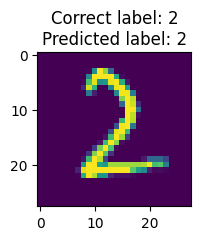

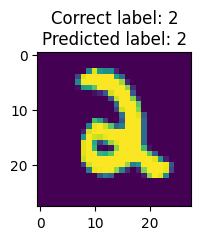

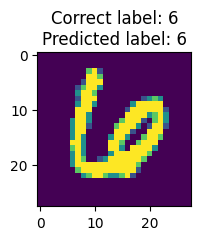

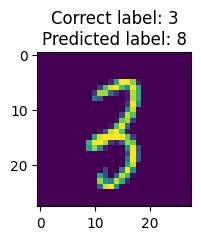

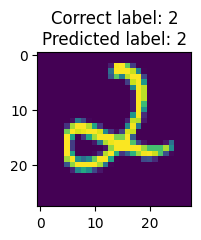

In [ ]:
# Visualize predictions on the test set
visualize_predictions(model, test_loader, num_samples=5)
